# Pymaceuticals Inc.
---

### Analysis

- Based on the scatter plot on mouse weight vs tumor volume, it seems that the heavier the weight the less effective the medice is because the tumor volume is higher, indicating the medicine isnt as effective.
-Capomulin and Ramicane seem to be the most effective.
-Ketapril on average had the highest tumor volume which would make believe it was the least effective.
 

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame

import pandas as pd

merged_df = pd.merge( mouse_metadata, study_results, on = 'Mouse ID')  


# Display the data table for preview

merged_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [15]:
# Checking the number of mice.

unique_mice = len(merged_df['Mouse ID'].unique())
unique_mice


249

In [17]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

# Identifying duplicate rows based on 'Mouse ID' and 'Timepoint'
duplicate_rows = merged_df[merged_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

# Getting the list of Mouse IDs with duplicate Timepoints
duplicate_mice = duplicate_rows['Mouse ID'].unique()

duplicate_mice

array(['g989'], dtype=object)

In [19]:
# Optional: Get all the data for the duplicate mouse ID. 

# Identifying duplicate rows based on 'Mouse ID' and 'Timepoint'
duplicate_rows = merged_df[merged_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

# Getting the list of Mouse IDs with duplicate Timepoints
duplicate_mice = duplicate_rows['Mouse ID'].unique()

# Getting all data for the duplicate Mouse IDs
all_duplicate_data = merged_df[merged_df['Mouse ID'].isin(duplicate_mice)]

all_duplicate_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [56]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

# Dropping duplicate rows based on 'Mouse ID' and keeping the first occurrence
cleaned_df = merged_df[merged_df['Mouse ID'].isin(all_duplicate_data)== False]

cleaned_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [57]:
# Checking the number of mice in the clean DataFrame.

number_of_mice = cleaned_df['Mouse ID'].nunique()

number_of_mice

249

## Summary Statistics

In [58]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

import pandas as pd

# Grouping the data by 'Drug Regimen'
grouped_data = cleaned_df.groupby('Drug Regimen')

# Calculating the mean, median, variance, standard deviation, and SEM of the tumor volume
tumor_mean = grouped_data['Tumor Volume (mm3)'].mean()
tumor_median = grouped_data['Tumor Volume (mm3)'].median()
tumor_variance = grouped_data['Tumor Volume (mm3)'].var()
tumor_standev = grouped_data['Tumor Volume (mm3)'].std()
tumor_sem = grouped_data['Tumor Volume (mm3)'].sem()

# Creating a summary DataFrame with calculated values
summary_statistics = pd.DataFrame({
    'Mean': tumor_mean, 'Median': tumor_median,
    'Variance': tumor_variance, 'Standard Deviation': tumor_standev,
    'SEM': tumor_sem
})

summary_statistics

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [59]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

summary_statistics = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

summary_statistics


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

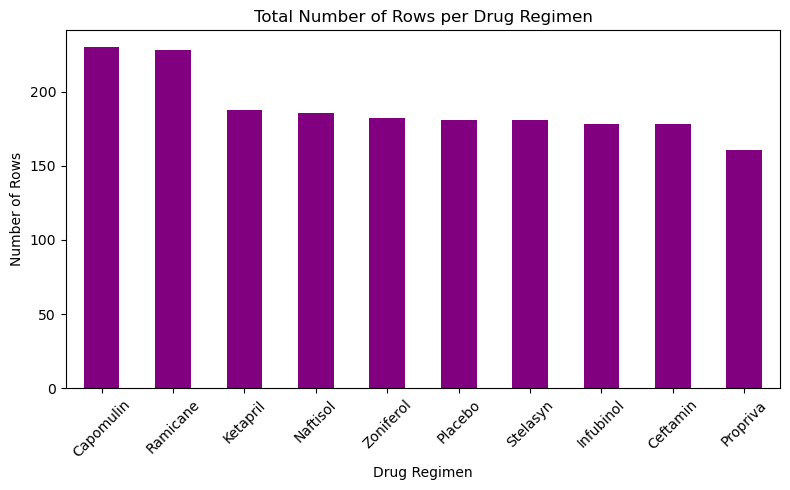

In [60]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

import matplotlib.pyplot as plt


# Grouping by 'Drug Regimen' and counting the number of rows (Mouse ID/Timepoints)
drug_counts = cleaned_df['Drug Regimen'].value_counts()

# Creating the bar plot 
plt.figure(figsize=(8, 5))
drug_counts.plot(kind='bar', color='purple')  
plt.title('Total Number of Rows per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


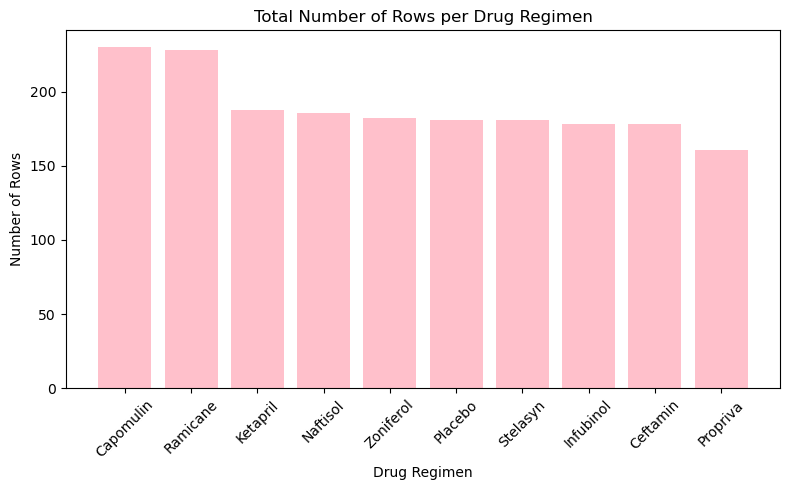

In [61]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

import matplotlib.pyplot as plt

# Grouping by 'Drug Regimen' and counting the number of rows (Mouse ID/Timepoints)
drug_counts = cleaned_df['Drug Regimen'].value_counts()

# Names for the x and y axis 
drug_regimens = drug_counts.index
row_numbers = drug_counts.values

# Creating a bar plot using pyplot
plt.figure(figsize=(8, 5))
plt.bar(drug_regimens, row_numbers, color='pink')  
plt.title('Total Number of Rows per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



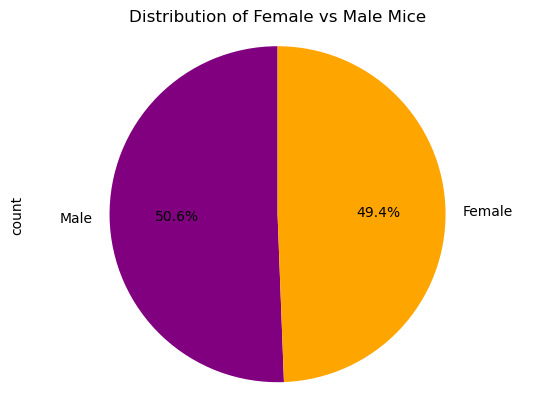

In [99]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

import pandas as pd
import matplotlib.pyplot as plt


# Counting the number of occurrences for each gender
gender_counts = cleaned_df['Sex'].value_counts()

# Creating a pie plot using Pandas
gender_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['purple', 'orange'])
plt.title('Distribution of Female vs Male Mice')
plt.axis('equal')  
plt.show()


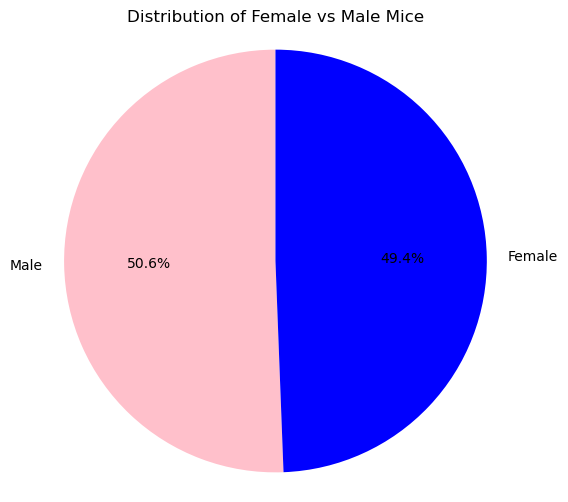

In [65]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

import matplotlib.pyplot as plt

# Counting the number of occurrences for each gender
gender_counts = cleaned_df['Sex'].value_counts()

# Creating a pie plot using Matplotlib's pyplot
plt.figure(figsize=(6, 6))  
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['pink', 'blue'])
plt.title('Distribution of Female vs Male Mice')
plt.axis('equal') 
plt.show()


## Quartiles, Outliers and Boxplots

In [68]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

# Filter data for the specified treatments: Capomulin, Ramicane, Infubinol, and Ceftamin
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
filtered_df = cleaned_df[cleaned_df['Drug Regimen'].isin(treatments)]

# Get the greatest timepoint for each mouse
last_timepoint = filtered_df.groupby('Mouse ID')['Timepoint'].max()

last_timepoint

Mouse ID
a203    45
a251    45
a275    45
a411    45
a444    45
        ..
y769    45
y793    45
y865    45
z578    45
z581    45
Name: Timepoint, Length: 100, dtype: int64

In [69]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

# Merge the group of greatest timepoints with the original DataFrame to get the tumor volume at the last timepoint
merged_last_timepoint = pd.merge(last_timepoint, cleaned_df, on=['Mouse ID', 'Timepoint'], how='left')

merged_last_timepoint

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
95,y769,45,Ceftamin,Female,6,27,68.594745,4
96,y793,45,Capomulin,Male,17,17,31.896238,2
97,y865,45,Ceftamin,Male,23,26,64.729837,3
98,z578,45,Ramicane,Male,11,16,30.638696,0


In [120]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)

treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

#Empty List
tumor_volume_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
   
# Locate the rows which contain mice on each drug and get the tumor volumes
    
capomulin_data = cleaned_df[cleaned_df['Drug Regimen'] == 'Capomulin']
capomulin_tumor_volumes = capomulin_data['Tumor Volume (mm3)']

ramicane_data = cleaned_df[cleaned_df['Drug Regimen']== 'Ramicane']
ramicane_tumor_volumes = ramicane_data['Tumor Volume (mm3)']

infubinol_data = cleaned_df[cleaned_df['Drug Regimen']== 'Infubinol']
infubinol_tumor_volumes = infubinol_data['Tumor Volume (mm3)']

ceftamin_data = cleaned_df[cleaned_df['Drug Regimen']== 'Ceftamin']
ceftamin_tumor_volumes = ceftamin_data['Tumor Volume (mm3)']

    # add subset 

drug_name = 'Capomulin'  
subset_tumor_volumes = cleaned_df.loc[cleaned_df['Drug Regimen'] == drug_name, 'Tumor Volume (mm3)']

drug_name = 'Ramicane'  
subset_tumor_volumes = cleaned_df.loc[cleaned_df['Drug Regimen'] == drug_name, 'Tumor Volume (mm3)']

drug_name = 'Infubinol'  
subset_tumor_volumes = cleaned_df.loc[cleaned_df['Drug Regimen'] == drug_name, 'Tumor Volume (mm3)']
 
drug_name = 'Ceftamin'  
subset_tumor_volumes = cleaned_df.loc[cleaned_df['Drug Regimen'] == drug_name, 'Tumor Volume (mm3)']    
    
    # Determine outliers using upper and lower bounds

    # Calculate quartiles and IQR for a subset of tumor volume data
Q1 = subset_tumor_volumes.quantile(0.25)
Q3 = subset_tumor_volumes.quantile(0.75)
IQR = Q3 - Q1

# Determine lower and upper bounds for potential outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify potential outliers
potential_outliers = subset_tumor_volumes[(subset_tumor_volumes < lower_bound) | (subset_tumor_volumes > upper_bound)]

potential_outliers

#Couldnt figure out this one to be honest


Series([], Name: Tumor Volume (mm3), dtype: float64)

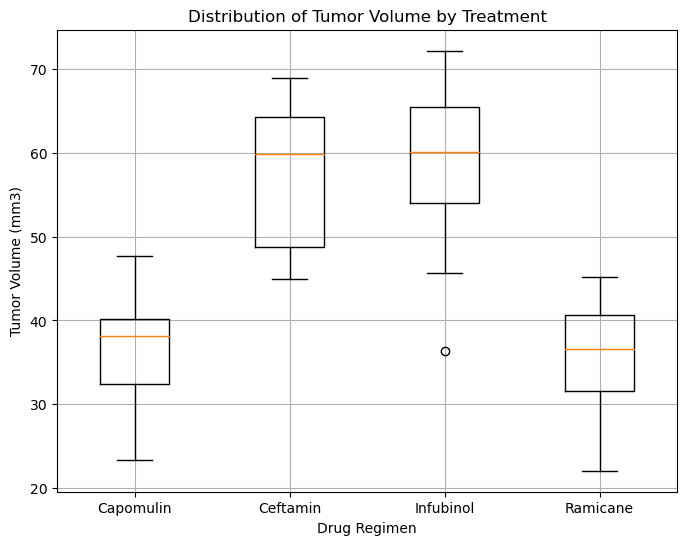

In [121]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

import matplotlib.pyplot as plt

# Group the data by 'Drug Regimen' and collect tumor volume data for each group
grouped_data = merged_last_timepoint.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list)

# Convert grouped data to a list for boxplot
data_to_plot = [volume_data for _, volume_data in grouped_data.items()]

# Create the boxplot
plt.figure(figsize=(8, 6)) 
plt.boxplot(data_to_plot, labels=grouped_data.index) 
plt.title('Distribution of Tumor Volume by Treatment')
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')
plt.grid(True)
plt.show()


In [85]:
#Filtered for Capomulin
capomulin_data = merged_df[merged_df['Drug Regimen'] == 'Capomulin']

capomulin_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


## Line and Scatter Plots

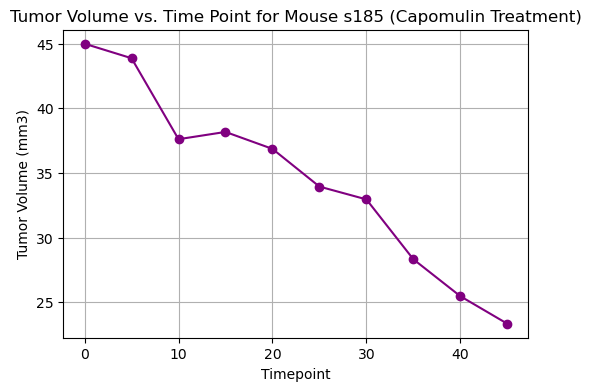

In [90]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

import matplotlib.pyplot as plt

# Select a single mouse ID treated with Capomulin (chose s185)
mouse_id = 's185'
single_mouse_data = capomulin_data[capomulin_data['Mouse ID'] == mouse_id]

# Create a line plot for tumor volume vs. time point for the selected mouse
plt.figure(figsize=(6, 4))
plt.plot(single_mouse_data['Timepoint'], single_mouse_data['Tumor Volume (mm3)'], marker='o', linestyle='-', color='purple')

# Set the labels and the title
plt.title(f"Tumor Volume vs. Time Point for Mouse {mouse_id} (Capomulin Treatment)")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.grid(True)
plt.show()


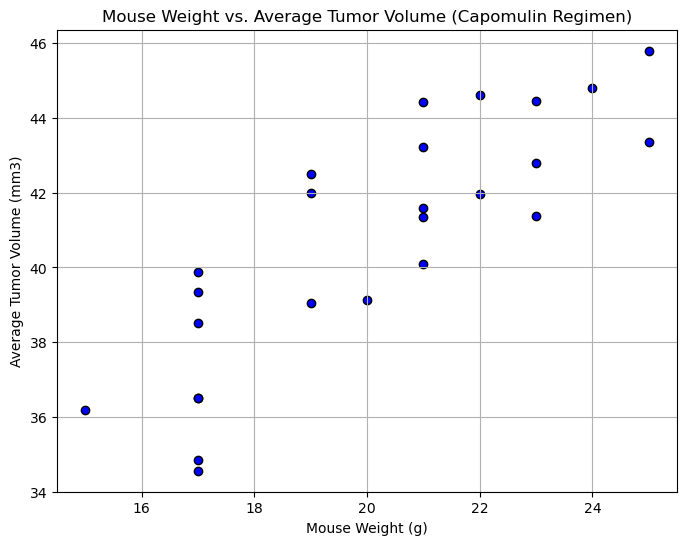

In [96]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

import matplotlib.pyplot as plt

capomulin_data = merged_df[merged_df['Drug Regimen'] == 'Capomulin']
capomulin_grouped = capomulin_data.groupby('Mouse ID')

avg_tumor_volume = capomulin_grouped['Tumor Volume (mm3)'].mean()
mouse_weight = capomulin_grouped['Weight (g)'].mean()

plt.figure(figsize=(8, 6))
plt.scatter(mouse_weight, avg_tumor_volume, marker='o', facecolors='blue', edgecolors='black')

# Set the labels and the title
plt.title("Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.grid(True)
plt.show()


## Correlation and Regression

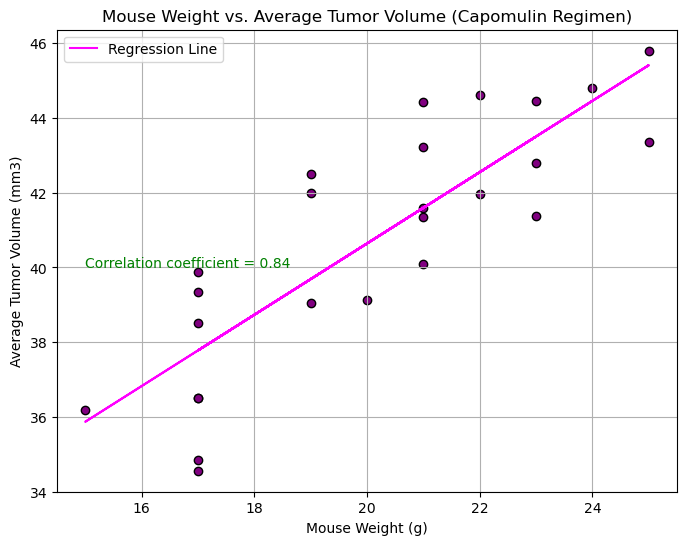

In [122]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

import matplotlib.pyplot as plt
from scipy.stats import linregress

# calculating the correlation coefficient and the linear regression model
correlation = avg_tumor_volume.corr(mouse_weight)

slope, intercept, r_value, p_value, std_err = linregress(mouse_weight, avg_tumor_volume)

# creating the scatter plot and adding a regression line
plt.figure(figsize=(8, 6))
plt.scatter(mouse_weight, avg_tumor_volume, marker='o', facecolors='purple', edgecolors='black')

plt.plot(mouse_weight, slope * mouse_weight + intercept, color='magenta', label='Regression Line')

# set the labels and the title
plt.title("Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

#showed correlation coefficent and linear regression
plt.text(15, 40, f'Correlation coefficient = {correlation:.2f}', fontsize=10, color='green')
plt.legend()
plt.grid(True)
plt.show()
